<a href="https://colab.research.google.com/github/Kaia-nyoung/2025-ML-class/blob/main/3%EC%A3%BC%EC%B0%A8/Weather_Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/ML-MK/weather.csv", header=0).dropna()
# 'RainTomorrow' 열을 삭제하고, 그 결과를 df에 다시 저장
df = df.drop('RainTomorrow', axis=1)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0


In [34]:
df['Rainfall'].value_counts()
#불균형확인

,count
Rainfall,
0.0,234
0.2,15
0.6,6
0.4,5
0.8,4
1.2,3
1.8,3
1.0,3
3.4,3


Text(0.5, 1.0, 'Label')

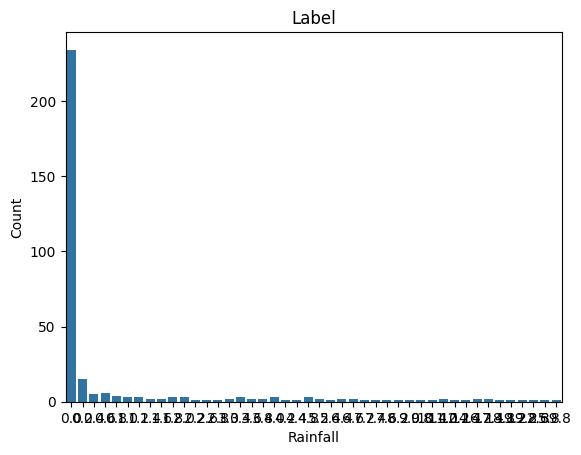

In [35]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Rainfall")
plt.xlabel("Rainfall")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("Label")

In [36]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [37]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [38]:
df.columns  # 컬럼명 확인

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')

In [39]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [40]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,59,0,90,111,0,15,43,7,8,12,...,29,15,93,82,7,7,95,129,0,16
1,70,0,138,130,16,20,75,1,12,0,...,41,22,37,27,5,3,123,145,1,16
2,81,0,135,106,16,27,24,7,33,3,...,43,55,20,22,8,7,103,99,1,43
3,83,0,133,42,43,34,69,7,20,14,...,23,42,7,21,2,7,88,50,1,13
4,84,0,86,46,13,26,84,10,18,10,...,29,35,84,113,7,7,68,60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100,152,0,36,99,6,29,10,...,1,2,64,46,1,3,148,167,0,0
362,48,0,81,141,0,51,104,3,17,6,...,6,8,95,98,0,1,120,160,0,0
363,49,0,125,78,0,40,36,2,14,1,...,24,33,131,147,3,2,96,81,0,0
364,51,0,125,130,0,23,50,7,16,11,...,30,25,103,91,6,7,107,146,0,0


In [41]:
# 입력과 출력 분리

X = df.drop(columns=["Rainfall"])
y = df["Rainfall"]

In [42]:
X

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,59,0,90,111,15,43,7,8,12,7,...,29,15,93,82,7,7,95,129,0,16
1,70,0,138,130,20,75,1,12,0,13,...,41,22,37,27,5,3,123,145,1,16
2,81,0,135,106,27,24,7,33,3,5,...,43,55,20,22,8,7,103,99,1,43
3,83,0,133,42,34,69,7,20,14,13,...,23,42,7,21,2,7,88,50,1,13
4,84,0,86,46,26,84,10,18,10,2,...,29,35,84,113,7,7,68,60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100,152,36,99,6,29,10,7,...,1,2,64,46,1,3,148,167,0,0
362,48,0,81,141,51,104,3,17,6,6,...,6,8,95,98,0,1,120,160,0,0
363,49,0,125,78,40,36,2,14,1,1,...,24,33,131,147,3,2,96,81,0,0
364,51,0,125,130,23,50,7,16,11,14,...,30,25,103,91,6,7,107,146,0,0


In [43]:
y

,Rainfall
0,0
1,16
2,16
3,43
4,13
...,...
361,0
362,0
363,0
364,0


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((262, 22), (66, 22), (262,), (66,))

In [47]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 학습 데이터(X_train)를 스케일링
# fit()으로 평균과 표준편차를 계산하고, transform()으로 변환
X_train_scaled = scaler.fit_transform(X_train)

In [48]:
# 테스트 데이터(X_test)를 스케일링
# X_train에서 계산된 평균과 표준편차를 그대로 사용해 변환
X_test_scaled = scaler.transform(X_test)

In [49]:
# 스케일링된 데이터를 사용하여 모델 학습

dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [50]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [51]:
# 정답값 출력

y_test

,Rainfall
254,1
110,0
281,6
9,36
93,0
...,...
279,18
60,0
126,0
292,0


In [52]:
#예측값 출력

dt_y_pred

array([ 1,  1, 15, 15,  1,  1,  1, 42, 42,  1,  1,  2,  1,  2,  3,  1,  1,
        1,  1,  1,  1,  1, 15,  3,  2,  4,  1, 15,  1,  1,  2,  1,  1,  1,
       15,  1,  1, 15,  1,  1,  1,  1,  1,  1, 15,  1,  1,  1, 15,  2, 15,
        2,  1,  2,  2, 15,  1,  1, 15, 15,  1, 15,  1,  1,  1, 15])

In [53]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 0.0152
[[ 0 38  6  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0